# Statistical Learning Theory 

Exercises taken from the book *Learning from Data* by Yaser Abu-Mostafa, Malik Magdon-Ismail and Hsuan-Tien Lin.

In [22]:
using Random
using DataFrames
using Plots

### Exercise 1.2


Suppose that we use a perceptron to detect spam messages. Let's say that each email message is represented by the frequency of occurrence of keywords, and the output is $+1$ if the message is considered spam.

(a) Can you think of some keywords that will end up with a large positive weight in the perceptron?<br>**Solution.** Some words that will end up with large positive weight may be: discount, price, save money, buy, best price, gift, free, click here. 

(b) How about keywords that will get a negative weight?
<br>**Solution.** Words with negative weight might be: important, job, academic, meeting, opportunity, document.

(c) What parameter in the perceptron directly affects how many borderline messages end up being classified as spam?
<br>**Solution.** The threshold or bias term $b$ is the parameter that affects the most the amount of borderline messages classified as spam, cause it represents the decision boundary.

### Excercise 1.3

The weight update rule in (1.3) has the nice interpretation that it moves in the direction of classifying $\mathbf{x}(t)$ correctly.

(a) Show that $y(t) \mathbf{w}^{\mathrm{T}}(t) \mathbf{x}(t)<0$. [Hint: $\mathbf{x}(t)$ is misclassified by $\mathbf{w}(t)$.]
<br>**Solution.** Since $\mathbf{x}(t)$ is missclassified by $\mathbf{w(t)}$ then $\mathbf{w}(t)^T\mathbf{x}(t)$ has the opposite sign of $y(t)\in\{-1,1\}$ (otherwise it will be well classified). Then $y(t)[\mathbf{w}^T(t)\mathbf{x}(t)]<0$

(b) Show that $y(t) \mathbf{w}^{\mathrm{T}}(t+1) \mathbf{x}(t)>y(t) \mathbf{w}^{\mathrm{T}}(t) \mathbf{x}(t)$. [Hint: Use (1.3).]
<br>**Solution.** Note that $y(t)\in\{-1,1\}$ so it is a scalar. By definition of the algorithm, $\mathbf{w}(t+1) = \mathbf{w}(t) + y(t)\mathbf{x}(t)$, 

$$\begin{align*}
y(t)\mathbf{w}^T(t+1)\mathbf{x}(t)&=y(t)[\mathbf{w}(t)+y(t)\mathbf{x}(t)]^T\mathbf{x}(t)\\
&= y(t)[\mathbf{w}(t)+y(t))\mathbf{x}(t)]\cdot\mathbf{x}(t) \\
&= y(t)\mathbf{w}^T(t)\mathbf{x}(t)+y(t)\lvert\lvert \mathbf{x}(t) \lvert\lvert^2 \\
&> y(t)\mathbf{w}^T(t)\mathbf{x}(t)
\end{align*}$$

Due to the distributive propperty of inner product and $\lvert\lvert \mathbf{x} \lvert\lvert ^2 > 0$.

(c) As far as classifying $\mathbf{x}(t)$ is concerned, argue that the move from $\mathbf{w}(t)$ to $\mathbf{w}(t+1)$ is a move 'in the right direction'
<br>**Solution.** When $\mathbf{x}(t)$ is  missclassified, the product $y(t)\mathbf{w}(t)^T\mathbf{x}(t)<0$, increasing it means making it closer to be positive or turning it positive, the fact that the product is positive implies $\mathbf{x}$ is correctly classified. As shown in the previous literal, $y(t) \mathbf{w}^{\mathrm{T}}(t+1) \mathbf{x}(t)>y(t) \mathbf{w}^{\mathrm{T}}(t) \mathbf{x}(t)$, i.e, in each iteration we are increasing the product $y\mathbf{w}^T\mathbf{x}$ so $\mathbf{w}$ is moving in the "right" direction considering that particular $\mathbf{x}$.

### Excersice 1.10
Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1,000 fair coins. Flip each coin independently 10 times. Let's focus on 3 coins as follows: $c_{1}$ is the first coin flipped; $c_{\text {rand }}$ is a coin you choose at random; $c_{\min }$ is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let $\nu_{1}, \nu_{\text {rand }}$ and $\nu_{\min }$ be the fraction of heads you obtain for the respective three coins.

In [23]:
function flip_coins(total_coins)
    states = zeros(total_coins)
    probs = rand(total_coins)
    head_indices = findall(x -> x>0.5,probs)
    states[head_indices'].= 1
    return states
end

function experiment(total_coins,total_flips)
    # Build a matrix to store every result 
    result_matrix = zeros(total_coins,total_flips)
    
    # Flip all coins repeteadly
    for i=1:total_flips
        # Flip all coins
        states = flip_coins(total_coins)
        # Find indices of heads
        heads_idxs = findall(==(1),states)
        # Update the current column in result matrix
        result_matrix[heads_idxs,i].=1
    end
    
    # Count number of heads in each row (coin)
    num_heads = [ count(==(1),result_matrix[i,:]) for i=1:total_coins ]
    # Find the coin with minimum rate of heads
    _ , c_min = findmin(num_heads)
    # Set a random coin
    c_rand = rand(1:total_coins)
    
    # Calculate the required rates
    v₁ = num_heads[1]/total_flips
    vᵣ = num_heads[c_rand]/total_flips
    vₘ = num_heads[c_min]/total_flips 
    
    return Array([v₁, vᵣ, vₘ, c_rand, c_min])
end  

experiment (generic function with 1 method)

(a) What is $\mu$ for the three coin selected?
<br>**Solution**. We have $\mu=0.5$ in the three cases because they are regular coins

(b) Repeat this entire experiment a large number of times (e.g., 100, 000 runs of the entire experiment) to get several instances of $\nu_{1}$, $\nu_{\text {rand }}$ and $\nu_{\min }$ and plot the histograms of the distributions of $\nu_{1}, \nu_{\text {rand }}$ and $\nu_{\min }$. Notice that which coins end up being $c_{\text {rand }}$ and $c_{\min }$ may differ from one run to another.
<br>**Solution**.

In [24]:
repetitions = 100000
big_experiment = zeros(repetitions,5)

for i=1:repetitions
    big_experiment[i,:]=experiment(1000,10)
end

In [25]:
data = DataFrame(big_experiment, [:v₁,:vᵣ,:vₘ,:c_rand,:c_min])
first(data,10)

,v₁,vᵣ,vₘ,c_rand,c_min
,Float64,Float64,Float64,Float64,Float64
1,0.7,0.3,0.0,598.0,621.0
2,0.5,0.6,0.0,885.0,111.0
3,0.5,0.8,0.0,59.0,66.0
4,0.4,0.3,0.0,63.0,283.0
5,0.4,0.4,0.1,522.0,90.0
6,0.5,0.6,0.0,972.0,323.0
7,0.5,0.4,0.1,263.0,135.0
8,0.7,0.5,0.0,325.0,484.0
9,0.5,0.5,0.0,251.0,126.0


We can notice that $c_{rand}$  and $c_{min}$ are changing over the repetitions of the experiment 

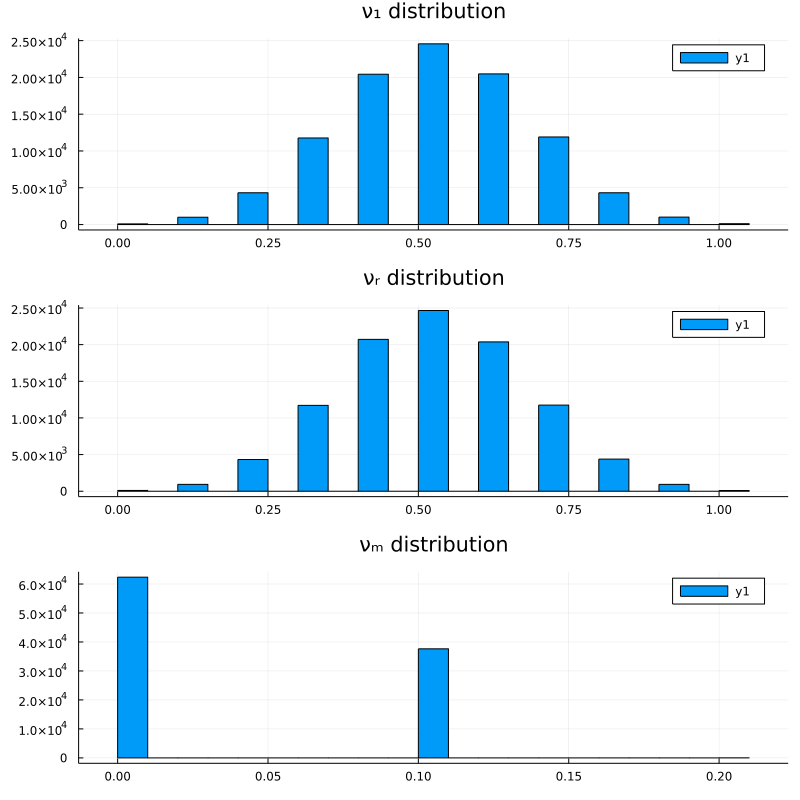

In [26]:
p1=histogram(data[:,:v₁], title="ν₁ distribution", bins=20)
p2=histogram(data[:,:vᵣ], title="νᵣ distribution", bins=20)
p3=histogram(data[:,:vₘ], title="νₘ distribution", bins=20)
plot(p1,p2,p3, layout=(3,1), size=(800,800))

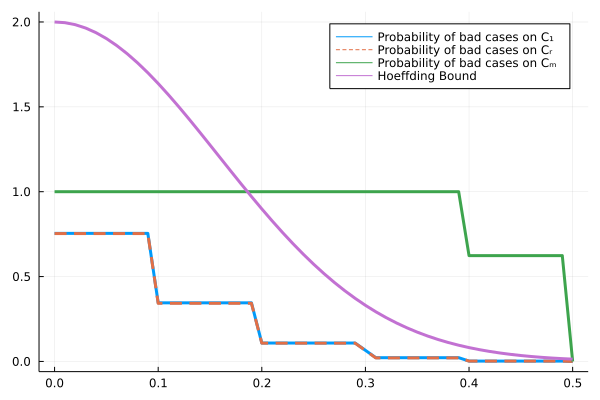

In [27]:
# Fixed μ
μ = 0.5

# Epsilon range values
ϵ_range = 0:0.01:0.5

# Hoeffding Bound
hoeff = 2*exp.(-2*10*ϵ_range.^2)

# Calculate probabilities with fixed epsilon
p₁,pᵣ,pₘ = [],[],[]
for ϵ in ϵ_range
    # Calculate the probability for each coin of interest
    for (v,p) in zip([:v₁,:vᵣ,:vₘ],[p₁,pᵣ,pₘ])
        # Count the bas cases
        badCases = findall(x->abs(x-μ)>ϵ, data[:,v])
        # The sum of bad cases over all cases is interpreted as a probability, due to the large number of reptitions
        # Save that probability
        push!(p, length(badCases)/repetitions)
    end
end

plot(ϵ_range,p₁, label="Probability of bad cases on C₁ ", lw=3)
plot!(ϵ_range,pᵣ,label="Probability of bad cases on Cᵣ", lw=3, ls=:dash)
plot!(ϵ_range,pₘ, label="Probability of bad cases on Cₘ", lw=3)

plot!(ϵ_range,hoeff, label="Hoeffding Bound", lw=3)

(d) Which coins obey the Hoeffding bound, and which ones do not? Explain why.
<br>**Solution.** We can see that Hoeffding inequality holds perfectly on $C_1$ and $C_{rand}$, due to they behave like independant random choosen coins, despite they belong to the experiment, they are arbitrary coins. If we only analyze  $C_1$, this an analogue experiment with just one coin. In the case of $C_{rand}$ according to the large numbers law it is more probable to choose a coin that is well behaved, i.e $\nu\approx\mu$. But in the case of $C_{min}$ it is the coin with the lowest head ratio $\nu$ in a experiment considering 1000 coins, so it is a particular extreme case over 1000 coins. According to the book: 

"*The fact that the sample was randomly selected from the bin is the reason we are able to make any kind of statement about $\mu$ beaing close to $\nu$. If the sample was not randomly selected but pickes in a particular was, we would lose the benefit of the probabilistic analysis and we would again be in the dark outside of the sample*"

$C_{min}$ was not randomly selected, so the Hoeffding Bound is obey

(e) Relate part (d) to the multiple bins in Figure 1.10.
<br>**Solution.** The situation with $C_{min}$ is similar to the bin in the last position according to the figure.

### Exercise 1.11
We are given a datatset $\mathcal{D}$ of $25$ training examples from an unknown target function $f : \mathcal{X} \longrightarrow \mathcal{Y}$ where $\mathcal{X} = \mathbb{R}$ and $\mathcal{Y} = \{-1, +1\}$. To learn $f$ we use a simple hypothesis set $\mathcal{H} = \{h_1, h_2\}$ where $h_1$ is the constant $+1$ function and $h_2$ is the constant $-1$.

We consider two learning algorithms, $S$ (smart) and $C$ (crazy). $S$ chooses the hypothesis that agrees the most with $\mathcal{D}$ and $C$ chooses the other hypothesis deliberately. Let us see how these algorithms perform out of sample from the deterministic and probabilistic points of view. Assume in the probabilistic view that there is a probability distribution on $\mathcal{X}$, and let $\mathbb{P}[f(x) = +1] = p$.

(a) Can $S$ produce a hypothesis that is guaranteed to perform better than random on any point outside $\mathcal{D}$?
<br> **Solution.** We can't guaranteed that because the training data set $\mathcal{D}$ could not been choosen in a randomly independant way. So for example if $\mathbb{P}[f(x) = +1] = p = 0.8$ but in the $\mathcal{D}$ accidentally the were more samples labeled with $-1$, then the smart algorthm will choose $h_2$ that would have an accuracy of $0.2$ outside $D$. On the other hand, a random choice would give a probability of $\frac{1}{2}$ for acertion outside $\mathcal{D}$ 

(b) Assume for the rest of the exercise that all the examples in $\mathcal{D}$ have $y_n = +1$. Is it possible that the hypothesis that $C$ produces turns out to be better than the hypothesis that $S$ produces?
<br>**Solution.** Yes, $C$ would have a better result if $p=0.1$.

(c) If $p = 0.9$, what is the probability that $S$ will produce a better hypothesis than $C$?
<br> **Solution.** Because every examples in $\mathcal{D}$ have $y_n = +1$, $S$ will choose $h_1$ and $C$ is choosing $h_2$. Then, outside $D$, $h_1$ will present an accuracy of $0.9$ and $h_2$ only $0.1$. So under theese conditions the fact $S$ will produce a better hypothesis is guaranteed. 

(d) Is there any value of $p$ for which it is more likely than not that $C$ will produce a better hypothesis than $S$?
<br> **Solution.** Assuming that every every examples in $\mathcal{D}$ have $y_n = +1$, when $p<0.5$ $S$ chooses $h_1$ and the accuracy outside $D$ would be less than 0.5, then $C$ produces $h_2$ which has a better assesment outside $D$.

### Exercise 1.12 
A friend comes to you with a learning problem. She says the target function $f$ is *completely unknown*, but she has 4000 data points. She is willing to pay you to solve her problem and produce for her a $g$ which approximates $f$. What is the best that you can promise among the following: 

(a) After learning you will provide her with a $g$ that you will guarantee approximates $f$ will out of sample. 

(b) After learning you will provide her with a $g$ and with a high probability the $g$ which you produce will approximate $f$ well out of smaple

(c) One of two things will happen 
   - (i) You will produce a hypothesis $g$;
   - (ii) You will declare that you failed. 
  <br> If you do return a hypothesis $g$, then with high probability the $g$ which you produce will approximate $f$ well out of sample.


**Solution.**
<br> We can't guarantee that the error in sample will be small, that depends on the learning algorithm and we don't have information about that and $f$ restricted to examples could be very complex.

With that amount of examples, depending on the space of hypothesis $\mathcal{H}$ one can promise with high probability that $E_{in}(g)$ is very close to $E_{out}(g)$. So if we can produce a $g$ with good accuracy, it will have a similar behavior with unknown data, and it will approximate $f$ well out of sample.  
